# project 3 : Data Visualization

## Data overview
### prosper Loan Data :
There are 113,937 loans in the dataset with 81 features. we select 14 features to fouces on them 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
df = pd.read_csv('prosperLoanData.csv')
df.head()


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
#columns of interest[Term,LoanStatus,ListingCategory,BorrowerState,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentCreditLines,OpenRevolvingAccounts,IncomeVerifiable,LoanOriginalAmount,DebtToIncomeRatio,,Recommendations,Investors]
columns_interest = ['Term','LoanStatus','BorrowerState','EmploymentStatus','EmploymentStatusDuration','IsBorrowerHomeowner','CurrentCreditLines','OpenRevolvingAccounts','BorrowerRate','LoanOriginalAmount','DebtToIncomeRatio','ProsperScore','Recommendations','IncomeRange']
df = df[columns_interest]

In [4]:
df.describe()

,Term,EmploymentStatusDuration,CurrentCreditLines,OpenRevolvingAccounts,BorrowerRate,LoanOriginalAmount,DebtToIncomeRatio,ProsperScore,Recommendations
count,113937.000000,106312.000000,106333.000000,113937.00000,113937.000000,113937.00000,105383.000000,84853.000000,113937.000000
mean,40.830248,96.071582,10.317192,6.96979,0.192764,8337.01385,0.275947,5.950067,0.048027
std,10.436212,94.480605,5.457866,4.63097,0.074818,6245.80058,0.551759,2.376501,0.332353
min,12.000000,0.000000,0.000000,0.00000,0.000000,1000.00000,0.000000,1.000000,0.000000
25%,36.000000,26.000000,7.000000,4.00000,0.134000,4000.00000,0.140000,4.000000,0.000000
50%,36.000000,67.000000,10.000000,6.00000,0.184000,6500.00000,0.220000,6.000000,0.000000
75%,36.000000,137.000000,13.000000,9.00000,0.250000,12000.00000,0.320000,8.000000,0.000000
max,60.000000,755.000000,59.000000,51.00000,0.497500,35000.00000,10.010000,11.000000,39.000000


In [5]:
df['LoanStatus'] = df['LoanStatus'].apply(lambda x: x if 'Past Due' not in x else 'Past Due')
loan_status_dict = ['Defaulted','Chargedoff', 'Past Due', 'Current', 'FinalPaymentInProgress', 'Completed']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = loan_status_dict)
df['LoanStatus'] = df['LoanStatus'].astype(ordered_var)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
Term                        113937 non-null int64
LoanStatus                  113932 non-null category
BorrowerState               108422 non-null object
EmploymentStatus            111682 non-null object
EmploymentStatusDuration    106312 non-null float64
IsBorrowerHomeowner         113937 non-null bool
CurrentCreditLines          106333 non-null float64
OpenRevolvingAccounts       113937 non-null int64
BorrowerRate                113937 non-null float64
LoanOriginalAmount          113937 non-null int64
DebtToIncomeRatio           105383 non-null float64
ProsperScore                84853 non-null float64
Recommendations             113937 non-null int64
IncomeRange                 113937 non-null object
dtypes: bool(1), category(1), float64(5), int64(4), object(3)
memory usage: 10.6+ MB


In [7]:
df.dropna(inplace = True)

In [8]:
df.isnull().sum(axis = 0)

Term                        0
LoanStatus                  0
BorrowerState               0
EmploymentStatus            0
EmploymentStatusDuration    0
IsBorrowerHomeowner         0
CurrentCreditLines          0
OpenRevolvingAccounts       0
BorrowerRate                0
LoanOriginalAmount          0
DebtToIncomeRatio           0
ProsperScore                0
Recommendations             0
IncomeRange                 0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77543 entries, 1 to 113936
Data columns (total 14 columns):
Term                        77543 non-null int64
LoanStatus                  77543 non-null category
BorrowerState               77543 non-null object
EmploymentStatus            77543 non-null object
EmploymentStatusDuration    77543 non-null float64
IsBorrowerHomeowner         77543 non-null bool
CurrentCreditLines          77543 non-null float64
OpenRevolvingAccounts       77543 non-null int64
BorrowerRate                77543 non-null float64
LoanOriginalAmount          77543 non-null int64
DebtToIncomeRatio           77543 non-null float64
ProsperScore                77543 non-null float64
Recommendations             77543 non-null int64
IncomeRange                 77543 non-null object
dtypes: bool(1), category(1), float64(5), int64(4), object(3)
memory usage: 7.8+ MB


# Univariate Exploration


about 50000 has current loan and 30000 has completed their loan and most of people has current loand and no one has final payment progress.

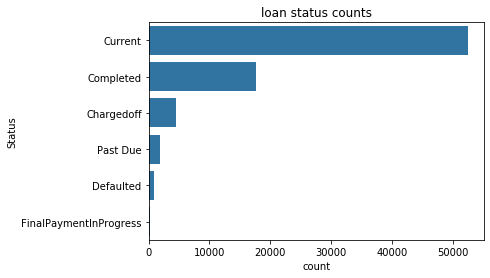

In [10]:
#loan status distribution
default_color = sns.color_palette()[0]
order_statues  = df['LoanStatus'].value_counts().index
sns.countplot(data = df ,y='LoanStatus' , color = default_color,order = order_statues);
plt.xlabel('count')
plt.ylabel('Status')
plt.title('loan status counts')
plt.show();

The very large spikes in frequency are at 4k,5k,10k, 15k, 20k, 25k and 35k.that is the most loan on demand 

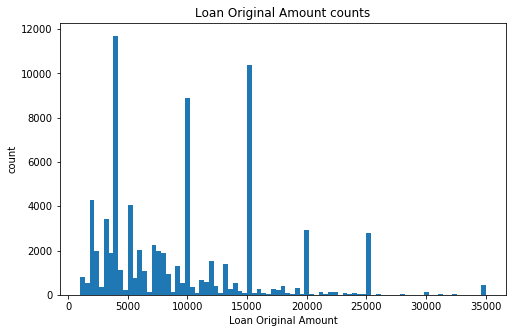

In [11]:
#distribution of loan original amount
plt.figure(figsize=[8, 5])
bins = np.arange(df.LoanOriginalAmount.min(), df.LoanOriginalAmount.max()+400, 400)
plt.hist(data = df ,x='LoanOriginalAmount' ,bins =bins);
plt.ylabel('count')
plt.xlabel('Loan Original Amount')
plt.title('Loan Original Amount counts')
plt.show();

about 70k took 36 month duration of loan and next in count is 60 month and low rate of people take 12 month loan duration

Text(0.5, 1.0, 'term counts')

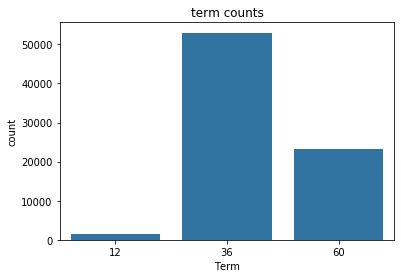

In [12]:
sns.countplot(data = df ,x='Term' , color = default_color);
plt.title('term counts')

about 60k employed takes loan and about 25k full time employee takes loan and these two has the most loan rate. nearly the not employed dont take any loan.and self employed and part time and retired has low rate to take a loan.

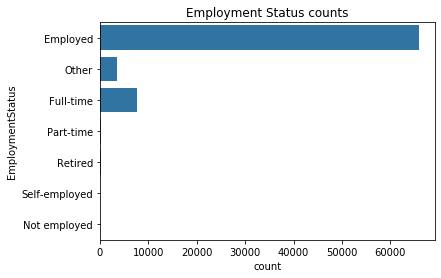

In [13]:
sns.countplot(data = df ,y='EmploymentStatus' , color = default_color);
plt.title('Employment Status counts');

seem the biggest state to takes loans is California and takes a lot of loans about 9000 and second is newyork and third is texes 

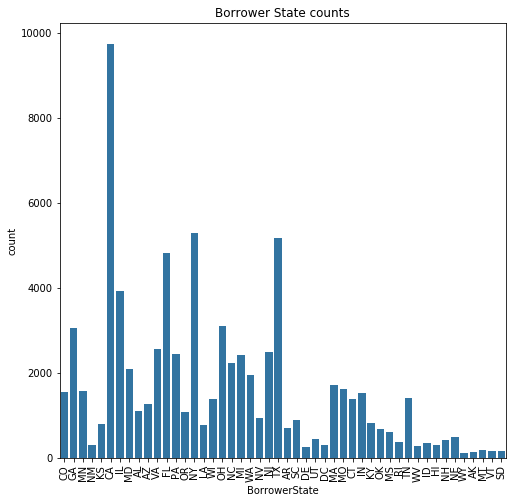

In [14]:
plt.figure(figsize = [8, 8])
sns.countplot(data = df ,x='BorrowerState' , color = default_color);
plt.xticks(rotation=90);
plt.title('Borrower State counts');

# Bivariate Exploration


### Loan Status vs. Prosper Score

seem charged off and past due and defaulted has less prosper score and less range  while completed has the heighest  prosper score from 5.5 to 8 and median close to 7.5 while the rest has less median and past due has the least median with 4.5.current and final payment has the biggest range from 4 to 8 and median 6 and 6.5

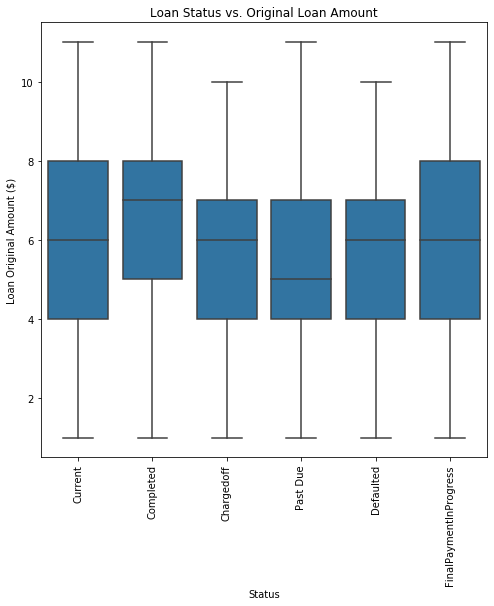

In [15]:
plt.figure(figsize = [8, 8])
sns.boxplot(data = df , x='LoanStatus',y='ProsperScore' ,color =default_color,order = order_statues);
plt.title('Loan Status vs. Original Loan Amount');
plt.xlabel('Status');
plt.ylabel('Loan Original Amount ($)');
plt.xticks(rotation=90);
plt.show();

## Loan Status vs. Original Loan Amount


seem the current has the biggest median with 10K and has the biggest loan original amount range and defaulted and past due has the smallest loan original amount range and smallest maedian with 5000

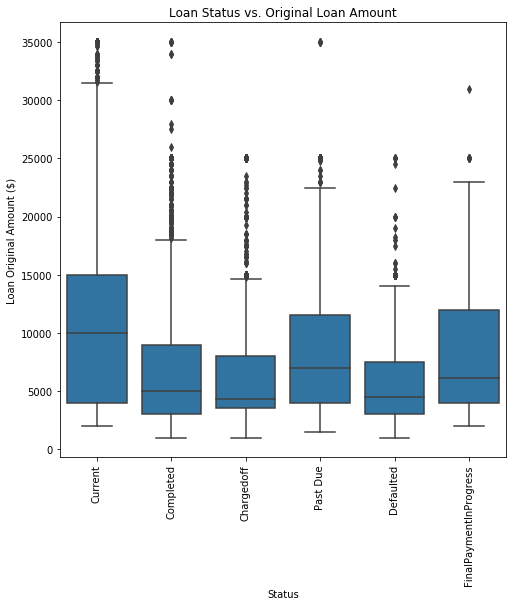

In [16]:
plt.figure(figsize = [8, 8])

sns.boxplot(data=df, x='LoanStatus', y='LoanOriginalAmount', color = default_color, order=order_statues)
plt.title('Loan Status vs. Original Loan Amount');
plt.xlabel('Status');
plt.ylabel('Loan Original Amount ($)');
plt.xticks(rotation=90);
plt.show();

## Employment Status vs Term

about 40k employed has loan 36 months length and 22k has 12 month and about 8000 full time person 36 months lengt. seems here most of people has loan's 36 months lenght.

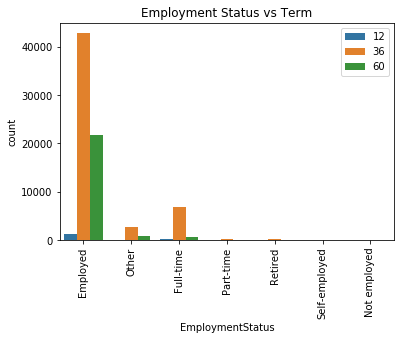

In [17]:
sns.countplot(data = df, x = 'EmploymentStatus', hue = 'Term',)
plt.xticks(rotation=90);
plt.legend(loc = 1);
plt.title('Employment Status vs Term');

## Loan Status vs Term

it confirms that most of people loans that takes 36 month lenght and prefer it on other lenghts. here current loans about 35k has 36 months lenght 

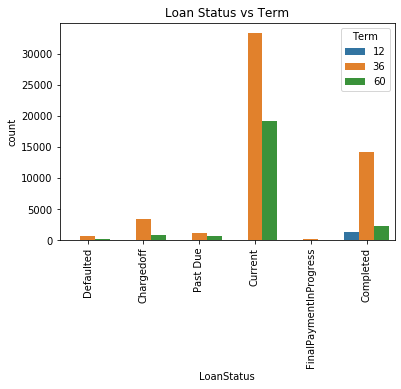

In [18]:
sns.countplot(data = df, x = 'LoanStatus', hue = 'Term');
plt.xticks(rotation=90);
plt.title('Loan Status vs Term');

# Multivariate Exploration


### Employment Status vs borrower\'s rate vs isHomeOwner

seem that home owner has the lowest avg borrower's rate  than has isnt home owner and not employeed has the biggest avg borrower's rate and retired is the second biggest. seem not employed is home owner while part time has 50% is home owner and the rest the average isnot home owner 

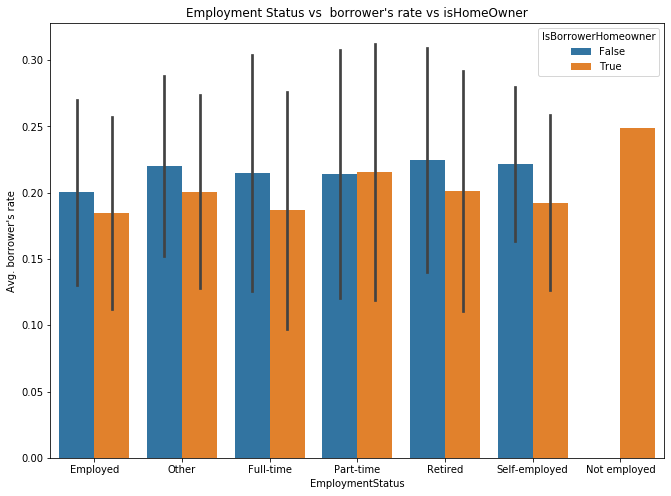

In [19]:
plt.figure(figsize=[11, 8]);
sns.barplot(data = df, x = 'EmploymentStatus', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner', ci = 'sd');
plt.ylabel('Avg. borrower\'s rate');
plt.title('Employment Status vs  borrower\'s rate vs isHomeOwner');

## Year borrower\'s rate vs. ProsperScore vs. IncomeRange

the higher the income, the lower the rate will be. the less prosperscore the higeher the brrower rate.

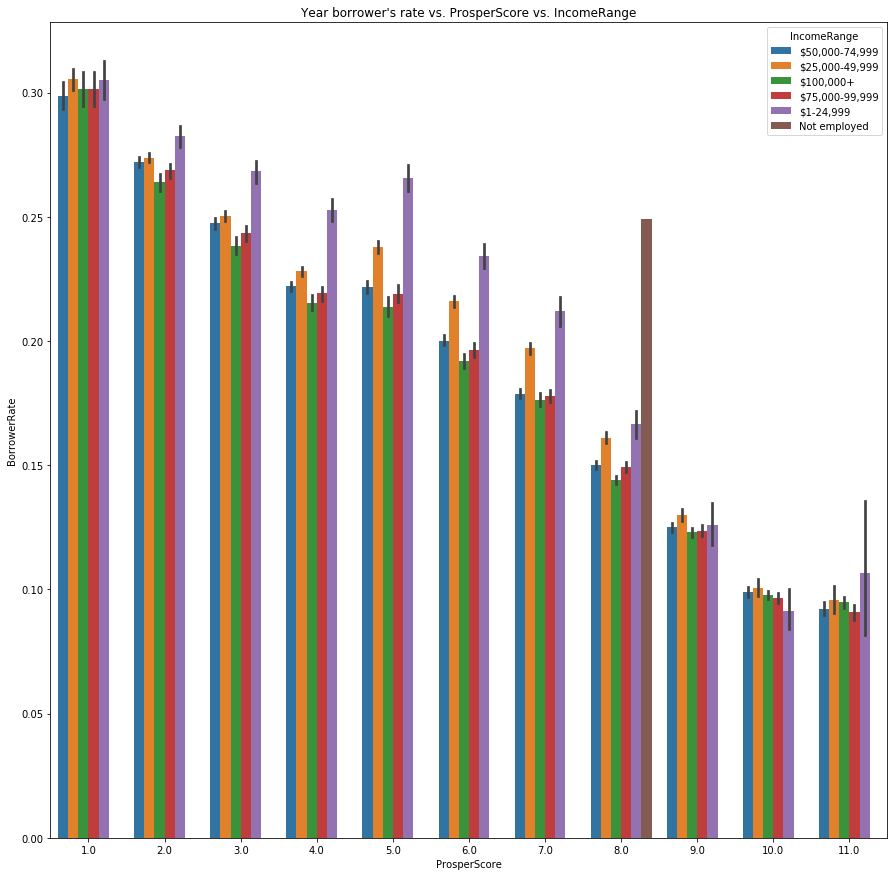

In [20]:
plt.figure(figsize=[15, 15]);
sns.barplot(data = df, x = 'ProsperScore', y = 'BorrowerRate', hue = 'IncomeRange');
plt.title('Year borrower\'s rate vs. ProsperScore vs. IncomeRange');